In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from prophet import Prophet
import numpy as np

In [36]:
url = "https://www.goodcarbadcar.net/tesla-inc-us-sales-figures/"

In [37]:
response = requests.get(url)
if response.status_code != 200:
    raise Exception('Failed to load page{}'.format(url))

In [38]:
soup = BeautifulSoup(response.content, 'html.parser')

In [39]:
print(soup)

<!DOCTYPE html>

<html dir="ltr" lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<meta content="#0083c2" name="theme-color"/>
<script data-cfasync="false" data-no-optimize="1">!function(){"use strict";function e(e){const t=e.match(/((?=([a-z0-9._!#$%+^&*()[\]<>-]+))\2@[a-z0-9._-]+\.[a-z0-9._-]+)/gi);return t?t[0]:""}function t(t){return e(a(t.toLowerCase()))}function a(e){return e.replace(/\s/g,"")}async function n(e){const t={sha256Hash:"",sha1Hash:""};if(!("msCrypto"in window)&&"https:"===location.protocol&&"crypto"in window&&"TextEncoder"in window){const a=(new TextEncoder).encode(e),[n,c]=await Promise.all([s("SHA-256",a),s("SHA-1",a)]);t.sha256Hash=n,t.sha1Hash=c}return t}async function s(e,t){const a=await crypto.subtle.digest(e,t);return Array.from(new Uint8Array(a)).map(e=>("00"+e.toString(16)).slice(-2)).join("")}function c(e){let t=!0;return Object.keys(e).f

In [40]:
table = soup.find('table', {'id':'table_1'})

In [41]:
print(table)

<table class="wpFixedHeader scroll responsive display nowrap data-t data-t wpDataTable wpDataTableID-9524" data-described-by="table_1_desc" data-wpdatatable_id="9524" id="table_1" style="display: none; ">
<!-- Table header -->
<thead>
<tr>
<th class="sort numdata integer" data-class="expand" style=""> </th>
<th class="numdata integer" style=""> </th>
<th class="numdata integer" style=""> </th>
<th class="numdata integer" style=""> </th>
<th class="numdata integer" style=""> </th>
<th class="numdata integer" style=""> </th>
<th class="numdata integer" style=""> </th>
<th class="numdata integer" style=""> </th>
<th class="numdata integer" style=""> </th>
<th class="numdata integer" style=""> </th>
<th class="numdata integer" style=""> </th>
<th class="numdata integer" style=""> </th>
<th class="numdata integer" style=""> </th>
</tr>
<tr>
<th class="wdtheader sort numdata integer" data-class="expand" style="">        Year</th> <th class="wdtheader numdata integer" style="">        Jan</th

In [42]:
headers = []
for th in table.find('thead').find_all('th'):
    header = th.text.strip()
    if header and header.lower() not in ['""']:  # Exclude unwanted headers
        headers.append(header)

In [43]:
print(headers)

['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [44]:
rows = []
for tr in table.find('tbody').find_all('tr'):
    cells = tr.find_all('td')
    row = [cell.text.strip() for cell in cells]
    rows.append(row)

In [45]:
print(rows)

[['2015', '0', '2,000', '1,200', '1,700', '1,700', '1,700', '1,700', '1,700', '1,700', '1,730', '1,712', '1,900'], ['2016', '2,075', '2,150', '2,250', '2,250', '2,250', '2,250', '2,250', '2,250', '2,250', '2,250', '2,250', '2,250'], ['2017', '2,800', '3,000', '3,000', '4,400', '4,400', '4,400', '4,400', '4,400', '4,517', '4,545', '4,745', '5,460'], ['2018', '6,875', '7,485', '8,820', '6,150', '11,250', '11,062', '16,675', '21,700', '29,975', '20,325', '24,600', '32,600'], ['2019', '8,325', '7,650', '14,625', '11,925', '16,350', '25,025', '15,650', '16,025', '23,025', '18,612', '19,301', '18,612'], ['2020', '22,350', '20,450', '10,000', '6,624', '14,720', '15,456', '48,846', '43,418', '47,036', '21,591', '17,736', '24,675'], ['2021', '21,120', '21,120', '23,760', '24,751', '23,799', '24,751', '28,350', '27,301', '28,350', '26,232', '26,232', '26,232'], ['2022', '37,594', '36,202', '89,575', '40,568', '39,066', '39,066', '37,518', '38,962', '37,518', '46,667', '44,800', '48,533'], ['2023

In [46]:
data = pd.DataFrame(rows, columns=headers)

In [47]:
data.head(10)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2015,0,"2,000","1,200","1,700","1,700","1,700","1,700","1,700","1,700","1,730","1,712","1,900"
1,2016,"2,075","2,150","2,250","2,250","2,250","2,250","2,250","2,250","2,250","2,250","2,250","2,250"
2,2017,"2,800","3,000","3,000","4,400","4,400","4,400","4,400","4,400","4,517","4,545","4,745","5,460"
3,2018,"6,875","7,485","8,820","6,150","11,250","11,062","16,675","21,700","29,975","20,325","24,600","32,600"
4,2019,"8,325","7,650","14,625","11,925","16,350","25,025","15,650","16,025","23,025","18,612","19,301","18,612"
5,2020,"22,350","20,450","10,000","6,624","14,720","15,456","48,846","43,418","47,036","21,591","17,736","24,675"
6,2021,"21,120","21,120","23,760","24,751","23,799","24,751","28,350","27,301","28,350","26,232","26,232","26,232"
7,2022,"37,594","36,202","89,575","40,568","39,066","39,066","37,518","38,962","37,518","46,667","44,800","48,533"
8,2023,"55,922","53,685","60,395","58,415","56,169","58,415","49,680","53,653","51,666","56,579","56,579","58,842"
9,2024,"51,809","51,809","53,881","18,570","19,314","19,314",0,0,0,0,0,0


In [48]:
month_columns = data.columns[1:]

In [49]:
for col in month_columns:
    data[col] = data[col].str.replace(',', '').astype(int)

In [50]:
data_long = pd.melt(data, id_vars=['Year'], var_name='Month', value_name='UnitSales')

In [51]:
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

In [52]:
data_long['Month'] = data_long['Month'].map(month_map)
data_long['Date'] = pd.to_datetime(data_long[['Year', 'Month']].assign(day=1))
data_long['Date'] = data_long['Date'].dt.strftime('%Y-%m-%d')

data_long['Date'] = pd.to_datetime(data_long['Date'])
data_long = data_long.sort_values(by='Date')

data_long = data_long.set_index('Date')

In [53]:
data_long.dtypes

Year         object
Month         int64
UnitSales     int32
dtype: object

In [54]:
data_long.tail(15)

,Year,Month,UnitSales
Date,,,
2023-10-01,2023,10,56579
2023-11-01,2023,11,56579
2023-12-01,2023,12,58842
2024-01-01,2024,1,51809
2024-02-01,2024,2,51809
2024-03-01,2024,3,53881
2024-04-01,2024,4,18570
2024-05-01,2024,5,19314
2024-06-01,2024,6,19314


In [55]:
data_long.drop(columns=['Year', 'Month'], inplace=True)

In [56]:
dates_to_remove = [
    '2024-07-01', '2024-08-01', '2024-09-01', 
    '2024-10-01', '2024-11-01', '2024-12-01'
]
data_long = data_long[~data_long.index.isin(dates_to_remove)]

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [59]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

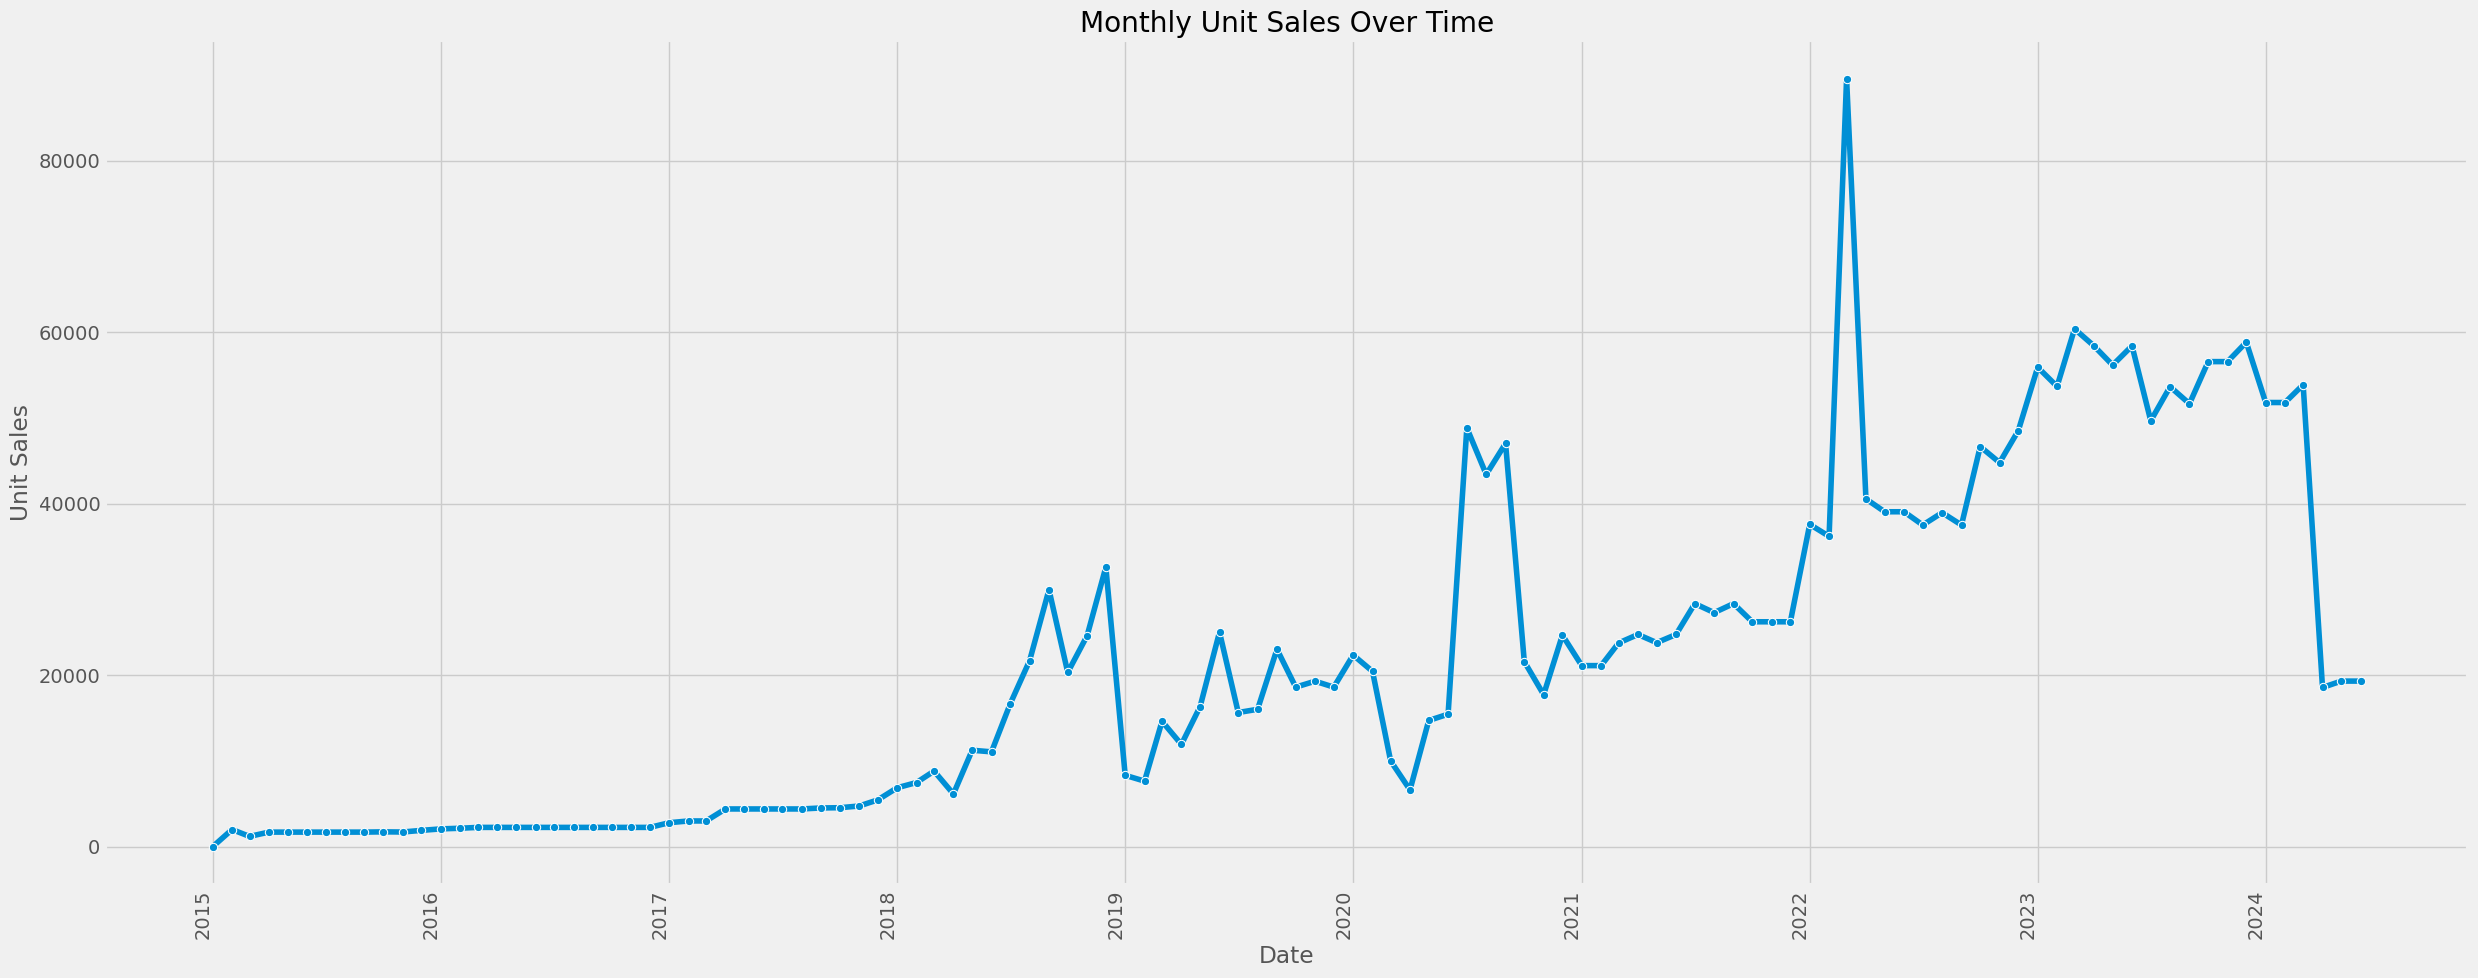

In [60]:
plt.figure(figsize=(25, 10))  # Increase figure size
sns.lineplot(data=data_long, x=data_long.index, y='UnitSales', marker='o')
plt.title('Monthly Unit Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [61]:
print(len(data_long))

114


In [62]:
split_index = 90
train_data = data_long[:split_index]
test_data = data_long[split_index:]

print(f"Training data:\n{len(train_data)}")
print(f"Test data:\n{len(test_data)}")

Training data:
90
Test data:
24


In [63]:
train_data_prophet = train_data.reset_index() \
    .rename(columns={'Date':'ds',
                     'UnitSales':'y'})

In [64]:
train_data_prophet.head(15)

,ds,y
0,2015-01-01,0
1,2015-02-01,2000
2,2015-03-01,1200
3,2015-04-01,1700
4,2015-05-01,1700
5,2015-06-01,1700
6,2015-07-01,1700
7,2015-08-01,1700
8,2015-09-01,1700
9,2015-10-01,1730


In [65]:
test_data_prophet = test_data.reset_index() \
    .rename(columns={'Date':'ds',
                     'UnitSales':'y'})

In [66]:
test_data_prophet.tail(15)

,ds,y
9,2023-04-01,58415
10,2023-05-01,56169
11,2023-06-01,58415
12,2023-07-01,49680
13,2023-08-01,53653
14,2023-09-01,51666
15,2023-10-01,56579
16,2023-11-01,56579
17,2023-12-01,58842
18,2024-01-01,51809


In [67]:
%%time
model = Prophet()
model.fit(train_data_prophet)

09:03:29 - cmdstanpy - INFO - Chain [1] start processing
09:03:29 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 93.8 ms
Wall time: 682 ms


In [68]:
test_forecast = model.predict(test_data_prophet)

In [69]:
test_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-01,34856.007439,26027.136001,48338.887563,34856.002486,34856.015027,2138.178634,2138.178634,2138.178634,2138.178634,2138.178634,2138.178634,0.0,0.0,0.0,36994.186073
1,2022-08-01,35319.808038,26423.147536,48531.869040,35319.780142,35319.840193,2377.620426,2377.620426,2377.620426,2377.620426,2377.620426,2377.620426,0.0,0.0,0.0,37697.428464
2,2022-09-01,35783.608637,30326.421496,50551.130909,35783.535705,35783.685854,5327.305260,5327.305260,5327.305260,5327.305260,5327.305260,5327.305260,0.0,0.0,0.0,41110.913897
3,2022-10-01,36232.447926,25492.458014,46914.888068,36232.322710,36232.586890,134.825040,134.825040,134.825040,134.825040,134.825040,134.825040,0.0,0.0,0.0,36367.272966
4,2022-11-01,36696.248525,26305.749551,46888.112813,36696.065831,36696.465236,-62.996098,-62.996098,-62.996098,-62.996098,-62.996098,-62.996098,0.0,0.0,0.0,36633.252427


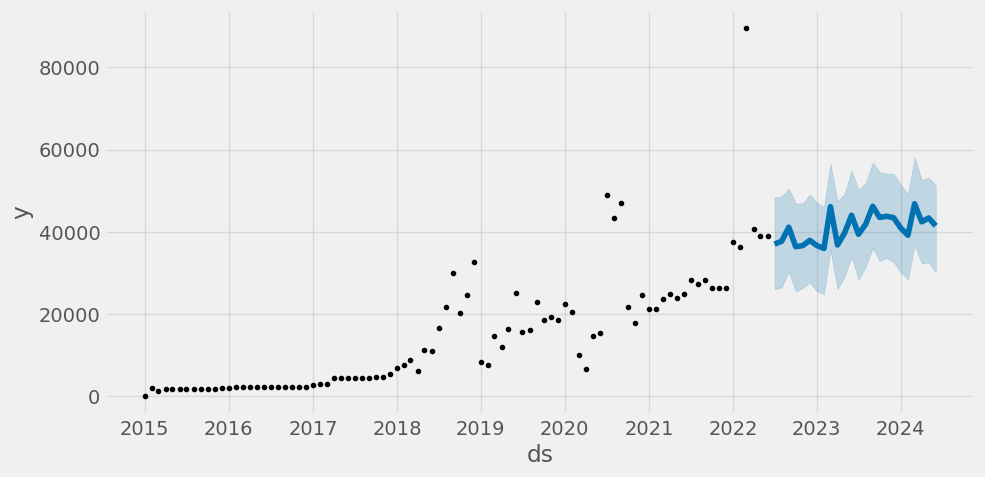

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
fig = model.plot(test_forecast, ax=ax)
plt.show()

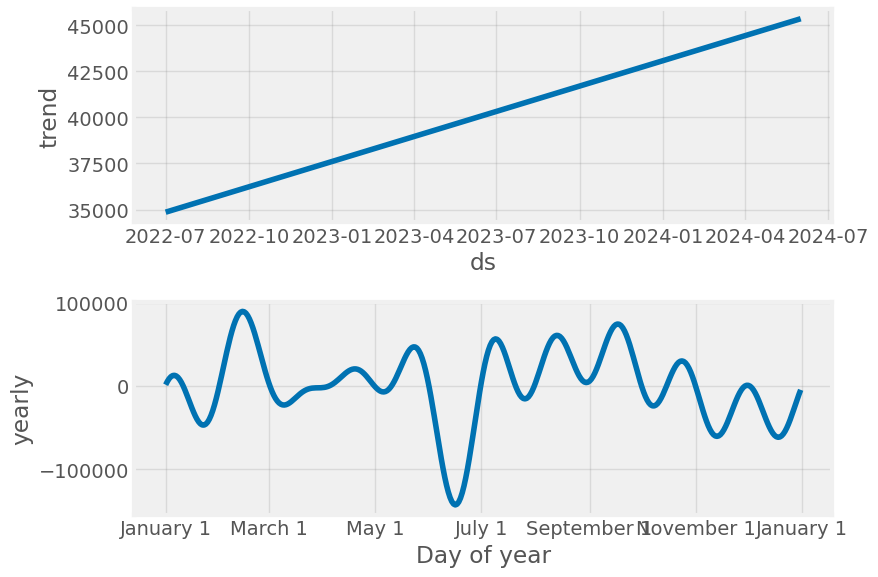

In [71]:
model.plot_components(test_forecast)
plt.show()

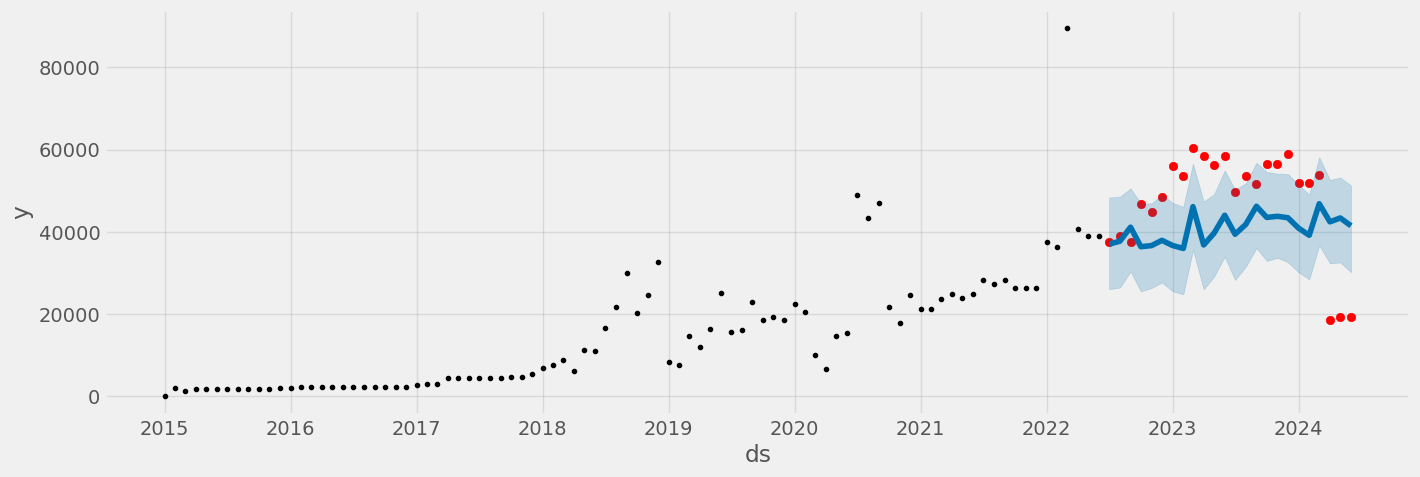

In [72]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(test_data.index, test_data['UnitSales'], color='r')
fig = model.plot(test_forecast, ax=ax)

In [75]:
mean_absolute_percentage_error(y_true=test_data['UnitSales'], y_pred=test_forecast['yhat'])

33.7597958258512

In [77]:
%%time
model_2 = Prophet(yearly_seasonality=True)
model_2.fit(train_data_prophet)

09:10:15 - cmdstanpy - INFO - Chain [1] start processing
09:10:15 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 93.8 ms
Wall time: 489 ms


In [78]:
test_forecast_2 = model_2.predict(test_data_prophet)

In [79]:
test_forecast_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-01,34856.007439,26535.102472,48387.465226,34856.001696,34856.012682,2138.178634,2138.178634,2138.178634,2138.178634,2138.178634,2138.178634,0.0,0.0,0.0,36994.186073
1,2022-08-01,35319.808038,26498.716729,48019.134396,35319.777426,35319.840946,2377.620426,2377.620426,2377.620426,2377.620426,2377.620426,2377.620426,0.0,0.0,0.0,37697.428464
2,2022-09-01,35783.608637,30552.987310,51900.511107,35783.532685,35783.678002,5327.305260,5327.305260,5327.305260,5327.305260,5327.305260,5327.305260,0.0,0.0,0.0,41110.913897
3,2022-10-01,36232.447926,26147.837907,47313.499390,36232.309826,36232.574750,134.825040,134.825040,134.825040,134.825040,134.825040,134.825040,0.0,0.0,0.0,36367.272966
4,2022-11-01,36696.248525,26847.605105,47581.359426,36696.042655,36696.447450,-62.996098,-62.996098,-62.996098,-62.996098,-62.996098,-62.996098,0.0,0.0,0.0,36633.252427


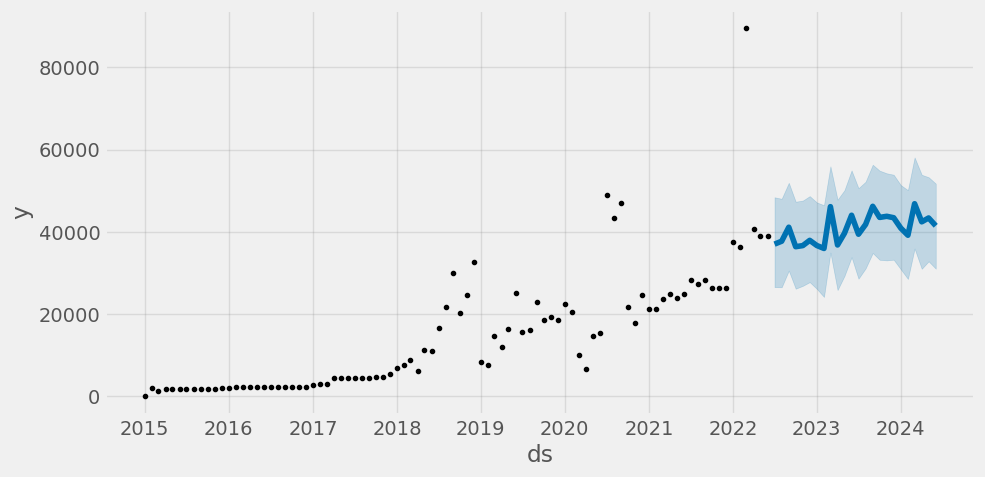

In [80]:
fig, ax = plt.subplots(figsize=(10,5))
fig = model_2.plot(test_forecast_2, ax=ax)
plt.show()

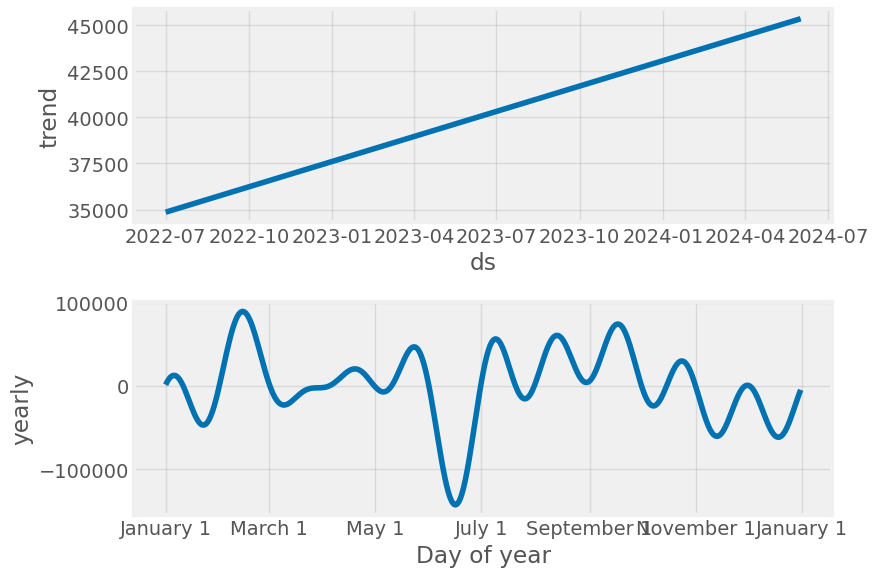

In [81]:
model_2.plot_components(test_forecast_2)
plt.show()

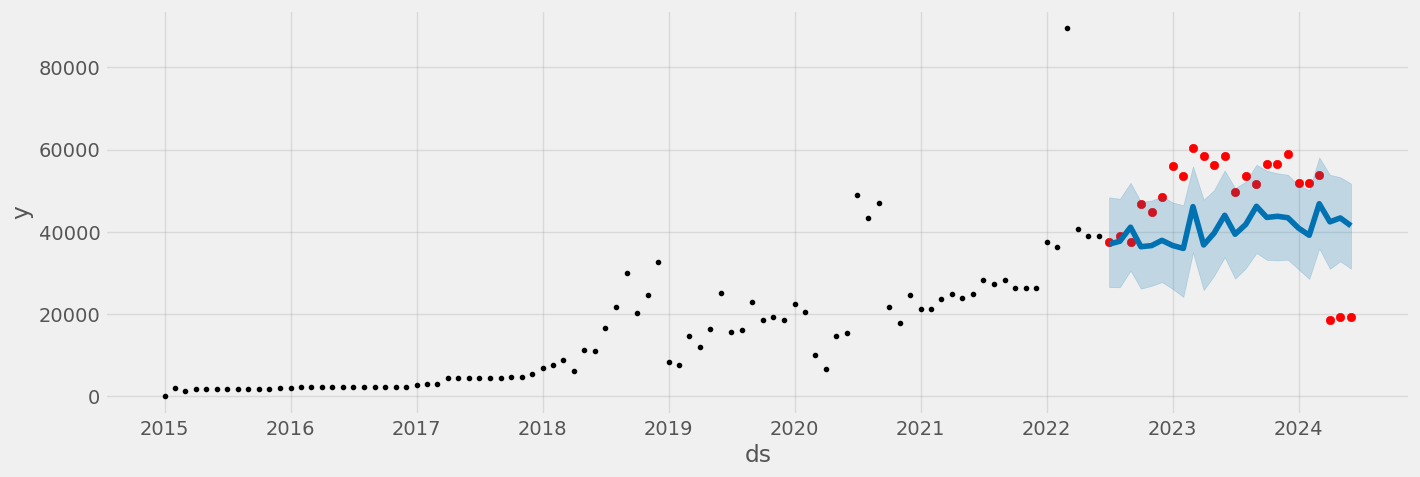

In [82]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(test_data.index, test_data['UnitSales'], color='r')
fig = model.plot(test_forecast_2, ax=ax)

In [83]:
mean_absolute_percentage_error(y_true=test_data['UnitSales'], y_pred=test_forecast_2['yhat'])

33.7597958258512